In [17]:
import numpy as np
import json
import pandas as pd
from ast import literal_eval
import librosa
import keras

import matplotlib.pyplot as plt

In [3]:
data_path='mfcc_data.json'

In [4]:
with open(data_path, "r") as fp:
        data = json.load(fp)

In [5]:
X = np.array(data["mfcc"])
y = np.array(data["label"])

In [6]:
X.shape

(13533, 130, 13)

In [7]:
y.shape

(13533,)

In [8]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [9]:
X_test.shape

(2707, 130, 13)

In [19]:
 model = keras.Sequential([

        # input layer
        keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

        # 1st dense layer
        keras.layers.Dense(512, activation='relu'),

        # 2nd dense layer
        keras.layers.Dense(256, activation='relu'),

        # 3rd dense layer
        keras.layers.Dense(64, activation='relu'),

        # output layer
        keras.layers.Dense(19, activation='softmax')
    ])

In [23]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [21]:
 model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               865792    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_8 (Dense)              (None, 19)                1235      
Total params: 1,014,803
Trainable params: 1,014,803
Non-trainable params: 0
_________________________________________________________________


In [24]:
 history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)

Train on 10826 samples, validate on 2707 samples
Epoch 1/50
10826/10826 [==============================] - 76s 7ms/step - loss: 7.1713 - accuracy: 0.2284 - val_loss: 2.4292 - val_accuracy: 0.2715
Epoch 2/50
10826/10826 [==============================] - 4s 331us/step - loss: 2.2682 - accuracy: 0.3107 - val_loss: 2.3632 - val_accuracy: 0.2859
Epoch 3/50
10826/10826 [==============================] - 4s 330us/step - loss: 2.0403 - accuracy: 0.3639 - val_loss: 1.7679 - val_accuracy: 0.4614
Epoch 4/50
10826/10826 [==============================] - 4s 332us/step - loss: 1.7488 - accuracy: 0.4832 - val_loss: 1.5596 - val_accuracy: 0.5434
Epoch 5/50
10826/10826 [==============================] - 4s 332us/step - loss: 1.5760 - accuracy: 0.5288 - val_loss: 2.0191 - val_accuracy: 0.4315
Epoch 6/50
10826/10826 [==============================] - 4s 335us/step - loss: 1.7318 - accuracy: 0.4890 - val_loss: 1.7440 - val_accuracy: 0.4636
Epoch 7/50
10826/10826 [==============================] - 4s 328

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


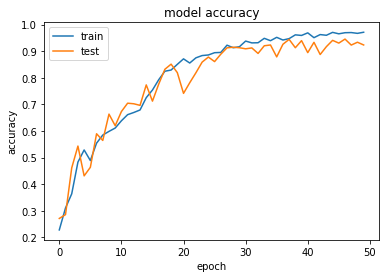

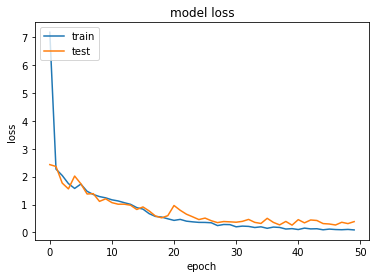

In [27]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss.png')
plt.show()